In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [90]:
df = df.drop(columns=['id'])
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [45]:
encoder = LabelEncoder()
for col in df.select_dtypes(exclude='number').columns:
    df[col] = encoder.fit_transform(df[col])
    
x, y = df.drop(columns=['stroke']), df['stroke']

In [41]:
# chi-squared test
select = SelectKBest(chi2, k=5)
select.fit_transform(x, y)
features = x.columns[select.get_support()]
list(features)

['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level']

In [40]:
# anova test
f_values, p_values = f_classif(x, y)
res = pd.DataFrame({'Features': x.columns, 'F values': f_values, 'P values': p_values})
res = res.sort_values(by=['F values', 'P values'], ascending=[False, True])
res.head()

,Features,F values,P values
1,age,326.916568,7.030778e-71
3,heart_disease,94.698406,3.451927e-22
7,avg_glucose_level,90.503870,2.767811e-21
2,hypertension,84.953542,4.367557e-20
4,ever_married,60.667230,8.128659e-15


In [57]:
# PCA
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=x.shape[1])
pca.fit_transform(x_scaled)
exp_var = pca.explained_variance_ratio_
cum = np.cumsum(exp_var)
comp = np.argmax(cum>=0.95)+1

pca_final = PCA(n_components=comp)
x_pca_final = pca_final.fit_transform(x_scaled)

df_pca = pd.DataFrame(x_pca_final, columns=[f"PC{i+1}" for i in range(comp)])
df_pca['stroke'] = y
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,stroke
0,2.456170,3.668303,-1.372363,-0.846573,-1.552876,-1.699250,1.132718,1.139673,0.092225,1
1,0.991044,0.515126,1.047682,1.083468,-0.235669,-1.388511,0.652979,-1.346549,-0.850548,1
2,2.218918,2.393093,0.474432,-1.838470,-2.678172,0.427304,0.596071,1.255172,-0.482574,1
3,1.504857,-0.610710,-0.869603,0.710532,0.319549,-0.902237,1.288253,-0.536455,-0.696968,1
4,1.879402,1.466354,1.219636,2.526505,0.463194,1.248927,-0.208410,-1.470036,-0.071322,1


Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1-Score: 0.94


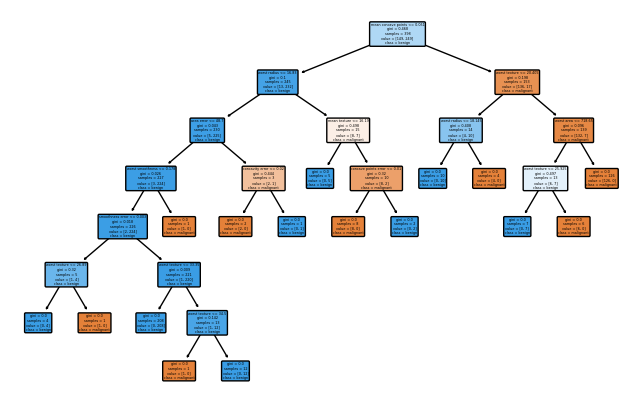

In [77]:
# Gini
data = load_breast_cancer()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

plt.figure(figsize=(8,5))
plot_tree(clf, filled=True, feature_names=x.columns, class_names=data.target_names, rounded=True)
plt.show()

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-Score: 0.98


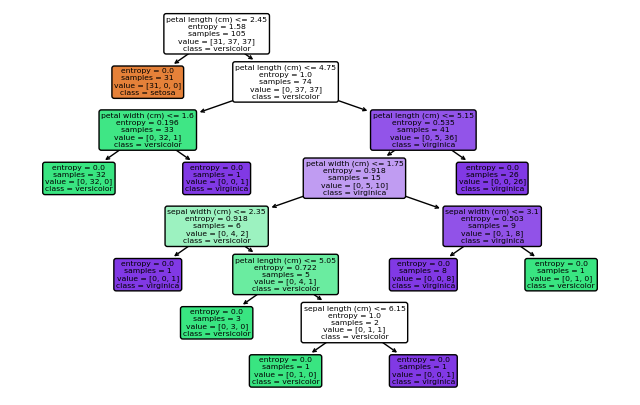

In [82]:
# Information Gain
data = load_iris()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

plt.figure(figsize=(8,5))
plot_tree(clf, filled=True, feature_names=x.columns, class_names=data.target_names, rounded=True)
plt.show()

In [93]:
# vizualizations
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


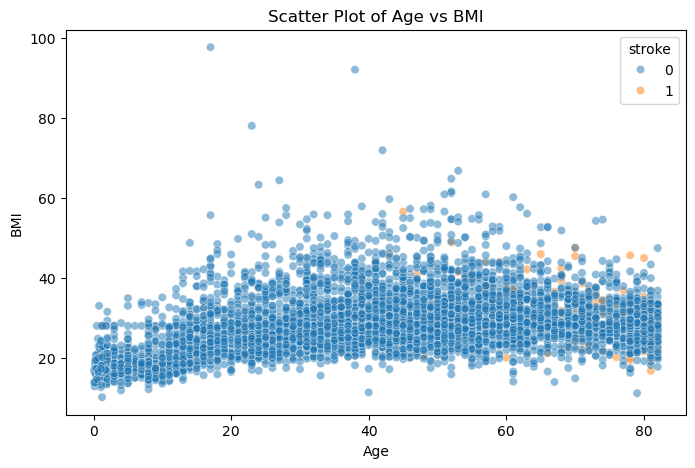

In [94]:
# scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='bmi', hue='stroke', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatter Plot of Age vs BMI')
plt.show()

In [ ]:
# horizontal bar chart
plt.figure(figsize=(8,5))
# plt.scatter(df['age'], df['bmi'], color='blue', alpha=0.5)
sns.scatterplot(data=df, x='age', y='bmi', hue='stroke', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Scatter Plot of Age vs BMI')
plt.show()